# A7.1 Autoencoder for Classification


We have talked in lecture about how an Autoencoder nonlinearly reduces the dimensionality of data.  In this assignment you will 
1. load an autoencoder network already trained in the MNIST data,
2. apply it to the MNIST training set to obtain the outputs of the units in the bottleneck layer as a new representation of each training set image with a greatly reduced dimensionality,
3. Train a fully-connected classification network on this new representation.
4. Report on the percent of training and testing images correctly classified.  Compare with the accuracy you get with the original images.

Download [nn_torch.zip](https://www.cs.colostate.edu/~anderson/cs445/notebooks/nn_torch.zip) and extract the files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import pickle
import gzip
import torch
import neuralnetworks_torch as nntorch

First, let's load the MNIST data. You may download it here: [mnist.pkl.gz](http://deeplearning.net/data/mnist/mnist.pkl.gz).

In [3]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1]

Xtest = test_set[0]
Ttest = test_set[1]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000,), (10000, 784), (10000,))

To load the network saved in Lecture Notes 21, run the following code.  This loads the saved torch neural network that was trained in a GPU.  It loads the state of that net (its weights) into a new net of the same structure but allocated on the CPU.

First download [mnist_autoencoder.pt](https://www.cs.colostate.edu/~anderson/cs445/notebooks/mnist_autoencoder.pt).

In [4]:
n_in = Xtrain.shape[1]
n_hiddens_per_layer = [500, 100, 50, 50, 20, 50, 50, 100, 500]
nnet_autoencoder = nntorch.NeuralNetwork(n_in, n_hiddens_per_layer, n_in, device='cpu')
nnet_autoencoder.standardize = ''

nnet_autoencoder.load_state_dict(torch.load('mnist_autoencoder.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

To get the output of the units in the middle hidden layer, run `use_to_middle` function implemented for you in `neuralnetworks_torch`.

In [5]:
Xtrain_reduced = nnet_autoencoder.use_to_middle(Xtrain)
Xtrain_reduced.shape

(50000, 20)

And while we are here, let's get the reduced representation of `Xtest` also.

In [6]:
Xtest_reduced = nnet_autoencoder.use_to_middle(Xtest)
Xtest_reduced.shape

(10000, 20)

## Requirement

Your jobs are now to
1. train one fully-connected classifier using `Xtrain_reduced` and `Ttrain` and test it with `Xtest_reduced` and `Ttest`, and
2. train a second fully-connected classifier using `Xtrain` and `Ttrain` and test it with `Xtest` and `Ttest`.

Try to find parameters (hidden network structure, number of epochs, and learning rate) for which the classifier given the reduced representation does almost as well as the other classifier with the original data. Discuss your results.

Here is an example for part of Step 1.  It shows a brief training session (small number of epochs and simple hidden layer structure) for using the reduced data. 

In [7]:
n_in = Xtrain_reduced.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,392,196,100,50], 10, device='cuda')

n_epochs = 100
reduced_classifier.train(Xtrain_reduced, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest_reduced)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 10: RMSE 1.156
Epoch 20: RMSE 0.621
Epoch 30: RMSE 0.397
Epoch 40: RMSE 0.303
Epoch 50: RMSE 0.240
Epoch 60: RMSE 0.191
Epoch 70: RMSE 0.150
Epoch 80: RMSE 0.284
Epoch 90: RMSE 0.152
Epoch 100: RMSE 0.104
% Correct  Ttest 95.76


In [8]:
n_in = Xtrain.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,392,196,100,50], 10, device='cuda')

n_epochs = 100
reduced_classifier.train(Xtrain, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 10: RMSE 1.604
Epoch 20: RMSE 0.888
Epoch 30: RMSE 0.538
Epoch 40: RMSE 0.341
Epoch 50: RMSE 0.276
Epoch 60: RMSE 0.191
Epoch 70: RMSE 0.137
Epoch 80: RMSE 0.829
Epoch 90: RMSE 0.349
Epoch 100: RMSE 0.222
% Correct  Ttest 94.23


In [9]:
n_in = Xtrain_reduced.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 100
reduced_classifier.train(Xtrain_reduced, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest_reduced)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 10: RMSE 1.156
Epoch 20: RMSE 0.565
Epoch 30: RMSE 0.377
Epoch 40: RMSE 0.275
Epoch 50: RMSE 0.202
Epoch 60: RMSE 0.144
Epoch 70: RMSE 0.131
Epoch 80: RMSE 0.093
Epoch 90: RMSE 0.061
Epoch 100: RMSE 0.040
% Correct  Ttest 96.50


In [10]:
n_in = Xtrain.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 100
reduced_classifier.train(Xtrain, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 10: RMSE 1.608
Epoch 20: RMSE 0.873
Epoch 30: RMSE 0.470
Epoch 40: RMSE 0.278
Epoch 50: RMSE 0.188
Epoch 60: RMSE 0.333
Epoch 70: RMSE 0.196
Epoch 80: RMSE 0.134
Epoch 90: RMSE 0.093
Epoch 100: RMSE 0.067
% Correct  Ttest 96.42


In [11]:
n_in = Xtrain_reduced.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 200
reduced_classifier.train(Xtrain_reduced, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest_reduced)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 20: RMSE 0.535
Epoch 40: RMSE 0.238
Epoch 60: RMSE 0.127
Epoch 80: RMSE 0.133
Epoch 100: RMSE 0.053
Epoch 120: RMSE 0.025
Epoch 140: RMSE 0.013
Epoch 160: RMSE 0.008
Epoch 180: RMSE 0.006
Epoch 200: RMSE 0.004
% Correct  Ttest 96.61


In [12]:
n_in = Xtrain.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 200
reduced_classifier.train(Xtrain, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 20: RMSE 0.821
Epoch 40: RMSE 0.267
Epoch 60: RMSE 0.259
Epoch 80: RMSE 0.106
Epoch 100: RMSE 0.054
Epoch 120: RMSE 0.034
Epoch 140: RMSE 0.024
Epoch 160: RMSE 0.018
Epoch 180: RMSE 0.014
Epoch 200: RMSE 0.011
% Correct  Ttest 96.74


In [13]:
n_in = Xtrain_reduced.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 500
reduced_classifier.train(Xtrain_reduced, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest_reduced)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 50: RMSE 0.173
Epoch 100: RMSE 0.037
Epoch 150: RMSE 0.008
Epoch 200: RMSE 0.004
Epoch 250: RMSE 0.002
Epoch 300: RMSE 0.002
Epoch 350: RMSE 0.001
Epoch 400: RMSE 0.001
Epoch 450: RMSE 0.001
Epoch 500: RMSE 0.000
% Correct  Ttest 96.87


In [15]:
n_in = Xtrain.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [784,400,200,100,20], 10, device='cuda')

n_epochs = 500
reduced_classifier.train(Xtrain, Ttrain, n_epochs, 0.02, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 50: RMSE 0.222
Epoch 100: RMSE 0.087
Epoch 150: RMSE 0.027
Epoch 200: RMSE 0.015
Epoch 250: RMSE 1.143
Epoch 300: RMSE 0.169
Epoch 350: RMSE 0.074
Epoch 400: RMSE 0.045
Epoch 450: RMSE 0.034
Epoch 500: RMSE 0.028
% Correct  Ttest 95.89


# Observations

The following configuration had a better performance on the reduced representation of Xtrain. We were able to acheive an accuracy of **96.87** on the test data and were able to get an accuracy of **95.89%** on the test data when the model was trained on Xtest and Xtrain. The accuracy increasedsignificantly with a more dence network i.e when the number of hidden layers increased and also we could observe a signifacant increase in the accuracy when we doubled the learning rate. One major observation was that this time the model was trained faster compared to previous assignment and was able to reach low error faster.

|Network|learning Rate|Epochs|
|-------|-------------|------|
|[784,400,200,100,20]|0.02|500|

## Extra Credit

For 1 point of extra credit repeat this assignment using a second data set, one that we have not used in class before. This will require you to to train a new autoencoder net to use for this part.

# MNIST Fashion Dataset

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

### read dataset 
train = pd.read_csv("fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
Xtrain, Xtest, Ttrain, Ttest = train_test_split(train_x, train_y, test_size=0.3)

## reshape the inputs
Xtrain = Xtrain.reshape(-1, 784)
Xtest = Xtest.reshape(-1, 784)
labels={
    0: 't_shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle_boots'}
# Ttrain=Ttrain.reshape(-1, 1)
# Ttest=Ttest.reshape(-1, 1)
# Xtrain = Xtrain.reshape(-1, 1, 28, 28)
# Xtest = Xtest.reshape(-1, 1, 28, 28)


In [3]:

np.shape(Xtrain),np.shape(Ttrain),np.shape(Xtest),np.shape(Ttest)


((42000, 784), (42000,), (18000, 784), (18000,))

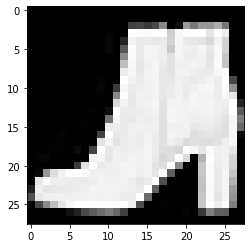

In [4]:
plt.imshow(Xtrain[1].reshape(28, 28),cmap='gray')

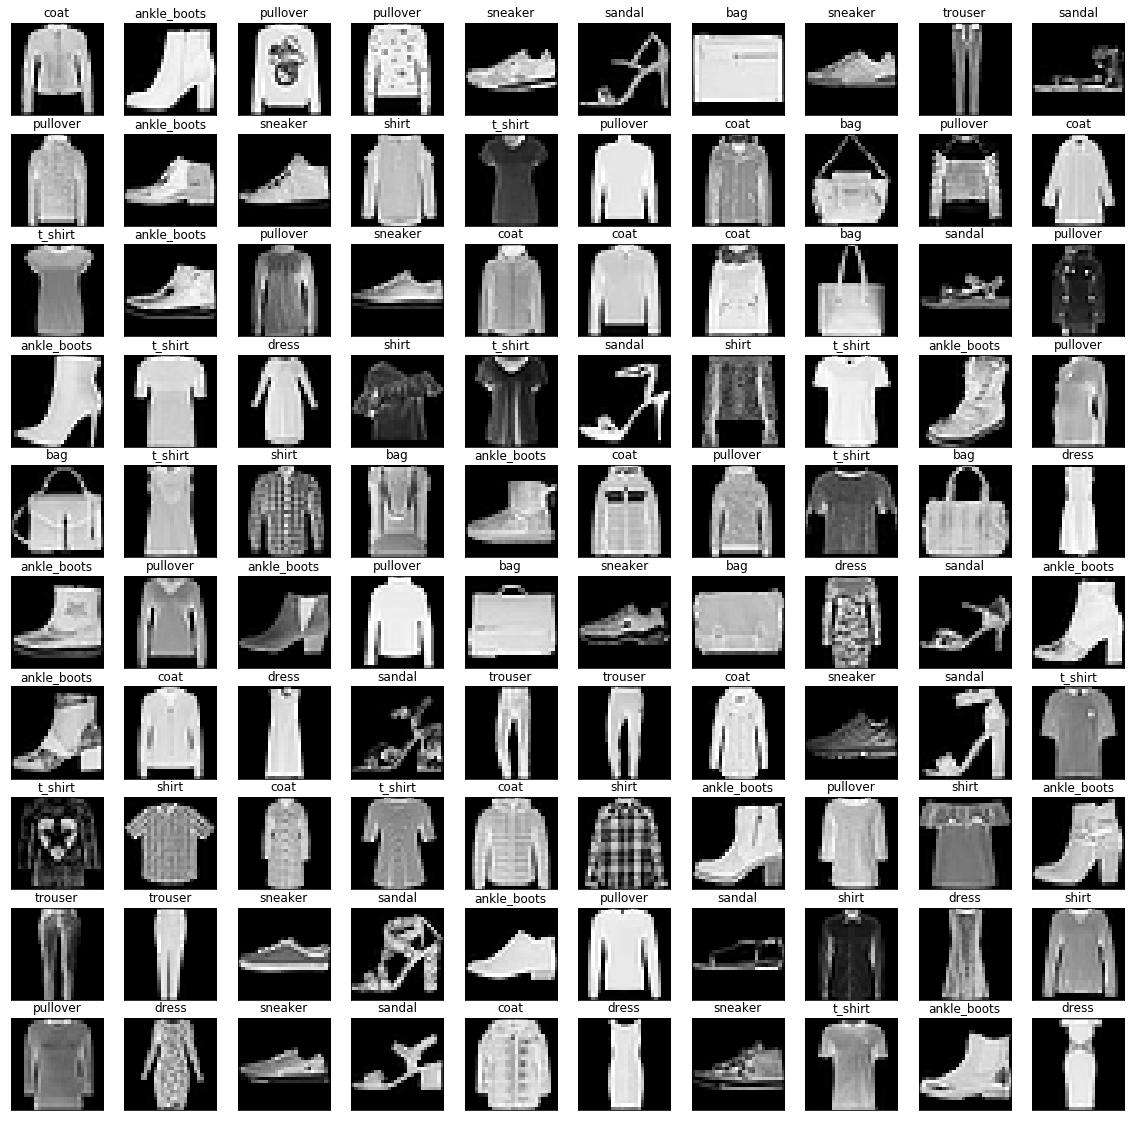

In [5]:
# from jupyterthemes import jtplot
# jtplot.reset()
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(Xtrain[i, :].reshape(28, 28),cmap='gray')
    plt.title(labels[Ttrain[i]])
    plt.xticks([])
    plt.yticks([])

#     plt.axis('off');

Epoch 10: RMSE 0.476
Epoch 20: RMSE 0.299
Epoch 30: RMSE 0.302
Epoch 40: RMSE 0.300
Epoch 50: RMSE 0.296
Epoch 60: RMSE 0.295
Epoch 70: RMSE 0.295
Epoch 80: RMSE 0.295
Epoch 90: RMSE 0.295
Epoch 100: RMSE 0.295


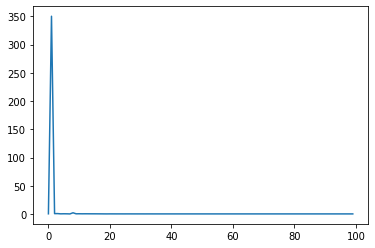

In [12]:
n_in = Xtrain.shape[1]
n_hiddens_per_layer = [1200,1000,500,32,500,1000,1200]
nnet = nntorch.NeuralNetwork(n_in, n_hiddens_per_layer, n_in, device='cuda',act_func='relu')   
nnet.train(Xtrain, Xtrain, 100, 0.01, method='adam', standardize='')

plt.plot(nnet.error_trace);


In [13]:
torch.save(nnet.state_dict(), 'mnist_fashion_autoencoder.pt')


In [14]:
n_in = Xtrain.shape[1]
n_hiddens_per_layer = [1200,1000,500,32,500,1000,1200]
nnet_autoencoder = nntorch.NeuralNetwork(n_in, n_hiddens_per_layer, n_in, device='cuda')
nnet_autoencoder.standardize = ''

nnet_autoencoder.load_state_dict(torch.load('mnist_fashion_autoencoder.pt', map_location=torch.device('cuda')))

<All keys matched successfully>

In [15]:
Xtrain_reduced = nnet_autoencoder.use_to_middle(Xtrain)
Xtrain_reduced.shape


(42000, 32)

In [16]:
Xtest_reduced = nnet_autoencoder.use_to_middle(Xtest)
Xtest_reduced.shape

(18000, 32)

In [24]:
n_in = Xtrain_reduced.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in,[500,200,100,50], 10, device='cuda')

n_epochs = 100
reduced_classifier.train(Xtrain_reduced, Ttrain, n_epochs, 0.1, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest_reduced)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 10: RMSE 4.580
Epoch 20: RMSE 3.223
Epoch 30: RMSE 2.578
Epoch 40: RMSE 2.464
Epoch 50: RMSE 2.331
Epoch 60: RMSE 2.311
Epoch 70: RMSE 2.306
Epoch 80: RMSE 2.304
Epoch 90: RMSE 2.303
Epoch 100: RMSE 2.303
% Correct  Ttest 10.06


In [15]:
n_in = Xtrain.shape[1]
reduced_classifier = nntorch.NeuralNetwork_Classifier(n_in, [1000,700,500,200,100,50], 10, device='cuda')

n_epochs = 200
reduced_classifier.train(Xtrain, Ttrain, n_epochs, 0.01, method='adam', standardize='')

Classes, _ = reduced_classifier.use(Xtest)

def percent_correct(Predicted, Target):
    return 100 * np.mean(Predicted == Target)

print(f'% Correct  Ttest {percent_correct(Classes, Ttest):.2f}')

Epoch 20: RMSE 1.232
Epoch 40: RMSE 1.092
Epoch 60: RMSE 0.907
Epoch 80: RMSE 0.696
Epoch 100: RMSE 0.612
Epoch 120: RMSE 0.487
Epoch 140: RMSE 0.473
Epoch 160: RMSE 0.509
Epoch 180: RMSE 0.495
Epoch 200: RMSE 0.519
% Correct  Ttest 82.69


I have tried to implement autoencoder on the MNIST fasshion data set, But I was not able to get good results with the redued data. The error was quite and high and I couldnt figure out what was the issue. I hope I receive partial credit for the work.

# Using tensor flow

In [2]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
# from imgaug import augmenters
# from random import randint
import pandas as pd
import numpy as np

In [10]:
### read dataset 
train = pd.read_csv("fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [11]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [14]:
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_11 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              5010

In [15]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 375us/step - loss: 0.3557 - val_loss: 0.1016
Epoch 2/20
48000/48000 [==============================] - 18s 369us/step - loss: 0.0806 - val_loss: 0.0696
Epoch 3/20
48000/48000 [==============================] - 18s 378us/step - loss: 0.0616 - val_loss: 0.0512
Epoch 4/20
48000/48000 [==============================] - 18s 370us/step - loss: 0.0458 - val_loss: 0.0418
Epoch 5/20
48000/48000 [==============================] - 18s 374us/step - loss: 0.0391 - val_loss: 0.0373
Epoch 6/20
48000/48000 [==============================] - 18s 371us/step - loss: 0.0348 - val_loss: 0.0324
Epoch 7/20
48000/48000 [==============================] - 18s 367us/step - loss: 0.0306 - val_loss: 0.0291
Epoch 8/20
48000/48000 [==============================] - 17s 363us/step - loss: 0.0279 - val_loss: 0.0297
Epoch 9/20
48000/48000 [==============================] - 17s 361us/step - loss: 0.0263 - val_

In [17]:
preds = model.predict(val_x)


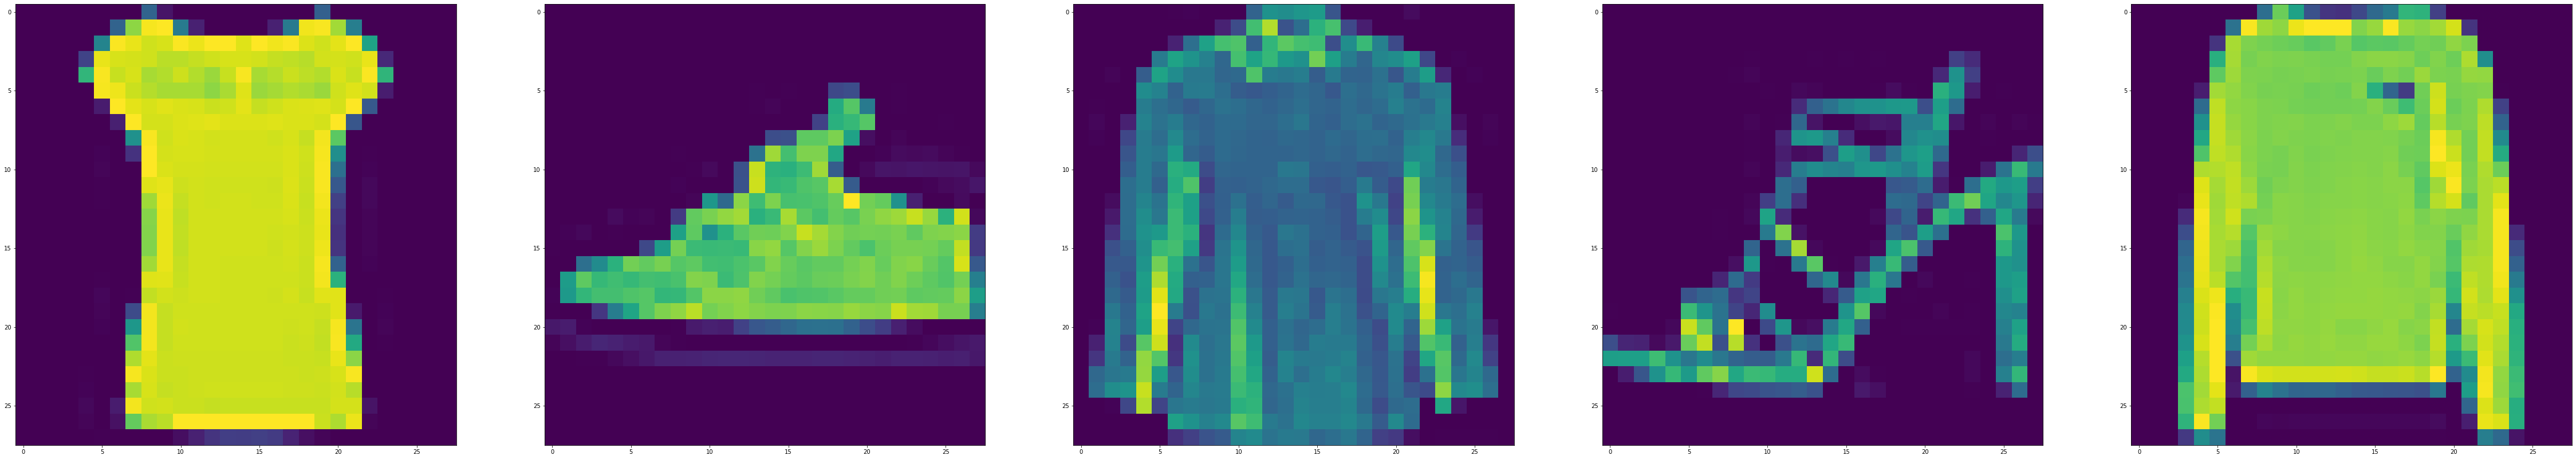

In [19]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

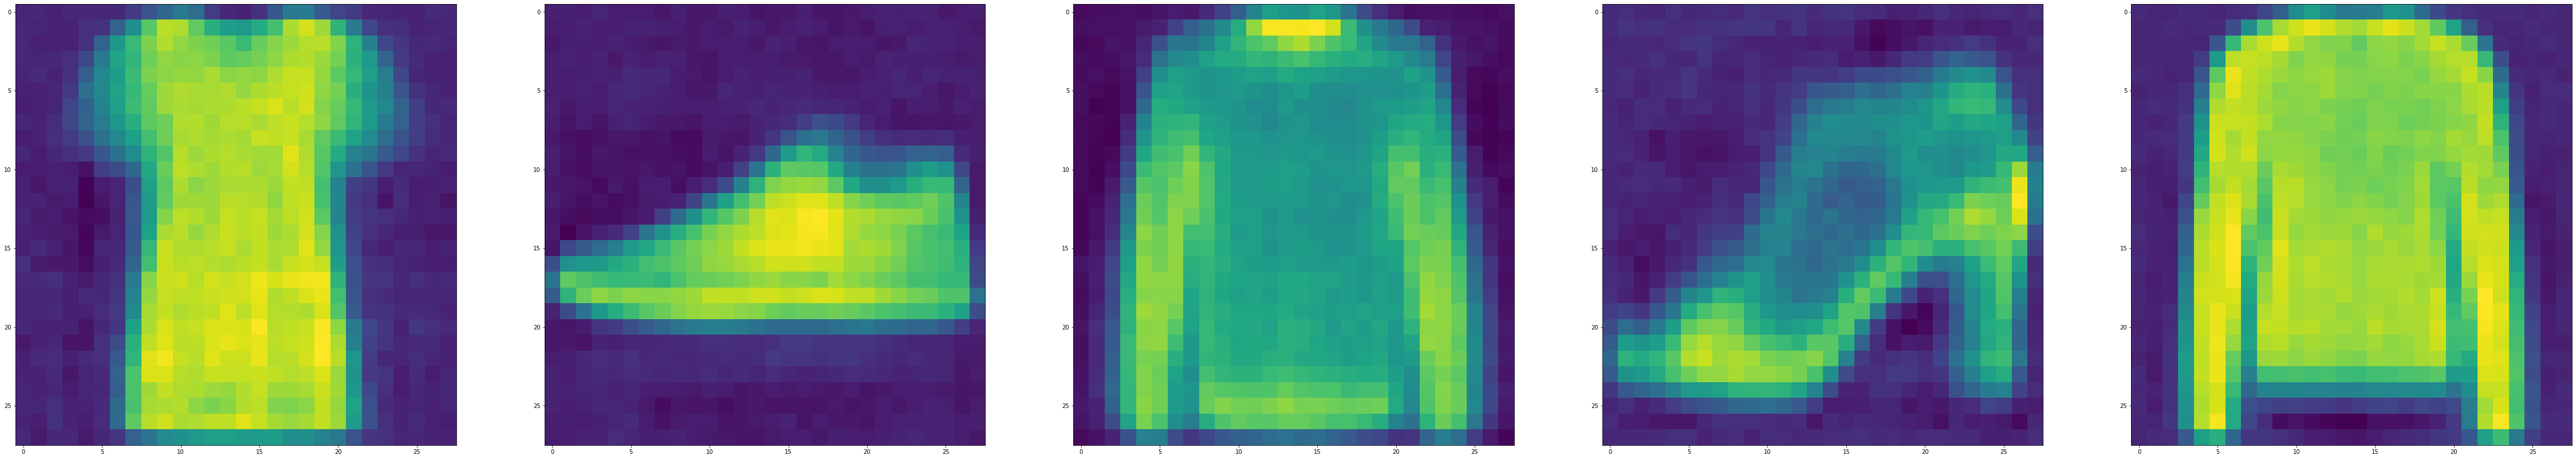

In [20]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()